In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import skimage as ski

In [2]:

# Load the image
img = ski.io.imread(r'../images/parrot.jpg')
float_image = ski.util.img_as_float(img)
# Apply global histogram equalization
eq_img_global = ski.exposure.equalize_hist(img)

# Define a function for local histogram equalization using block processing
def local_histogram_equalization(image, block_size=(51, 51)):
    equalized_image = np.zeros_like(image)
    for row in range(0, image.shape[0], block_size[0]):
        for col in range(0, image.shape[1], block_size[1]):
            block = image[row:row+block_size[0], col:col+block_size[1]]
            equalized_block = ski.exposure.equalize_hist(block)
            equalized_image[row:row+block_size[0], col:col+block_size[1]] = equalized_block
    return equalized_image

eq_img_local = local_histogram_equalization(float_image, block_size=(200,200))


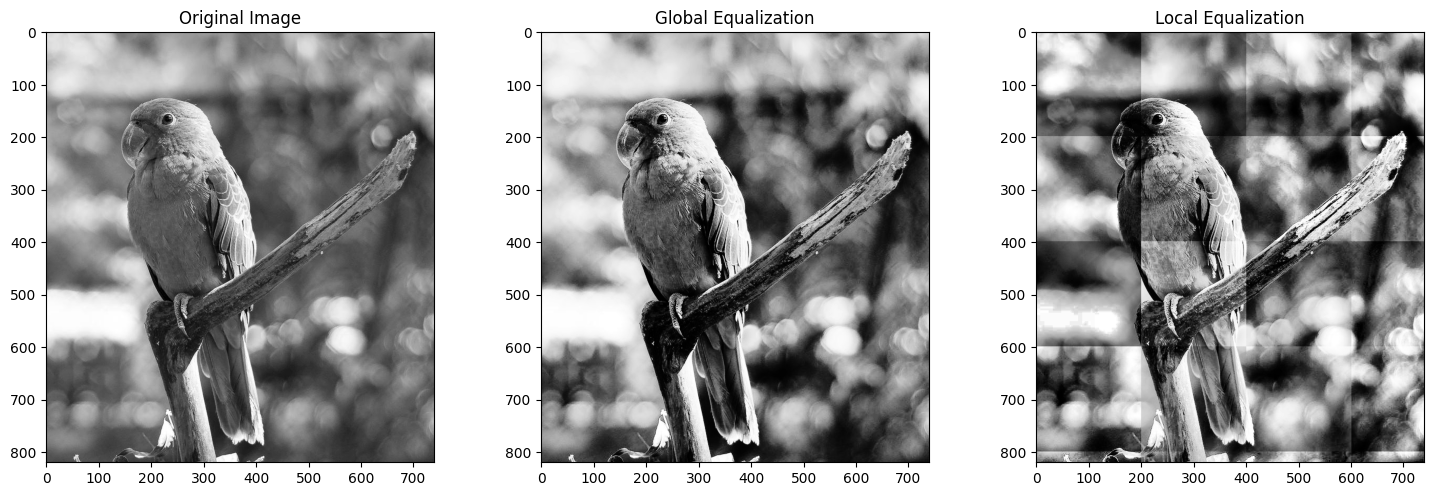

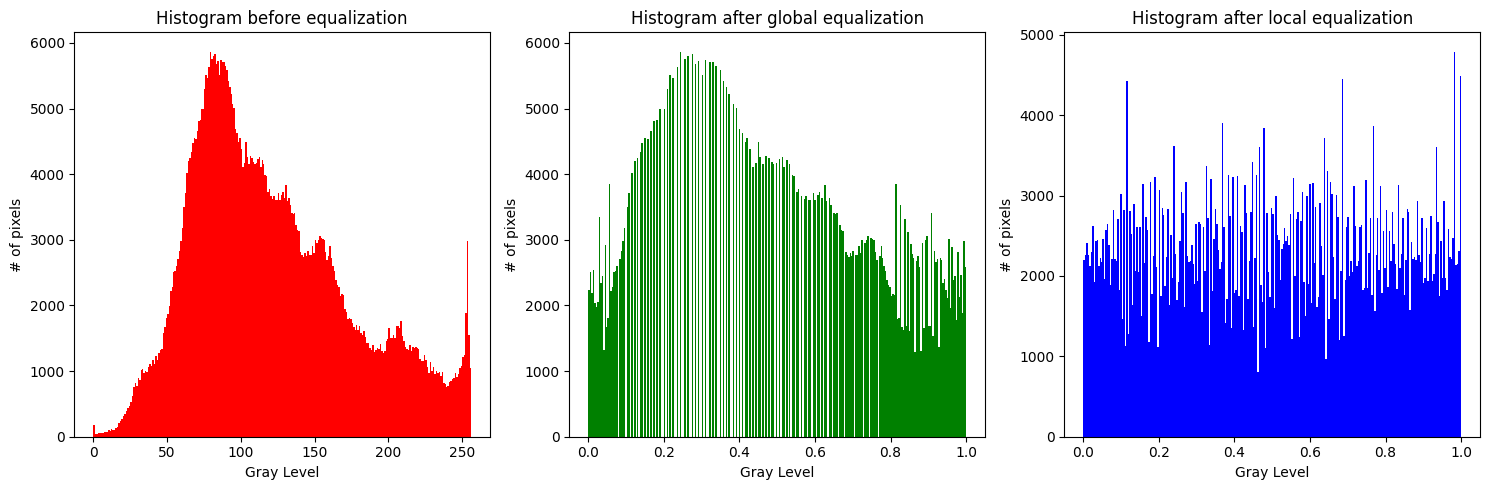

In [3]:
# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(eq_img_global, cmap='gray')
plt.title('Global Equalization')

plt.subplot(1, 3, 3)
plt.imshow(eq_img_local, cmap='gray')
plt.title('Local Equalization')

plt.tight_layout()
plt.show()

# Plot histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(img.flatten(), bins=256, range=[0,256], color='r')
plt.title('Histogram before equalization')
plt.xlabel('Gray Level')
plt.ylabel('# of pixels')

plt.subplot(1, 3, 2)
plt.hist(eq_img_global.flatten(), bins=256, range=[0,1], color='g')
plt.title('Histogram after global equalization')
plt.xlabel('Gray Level')
plt.ylabel('# of pixels')

plt.subplot(1, 3, 3)
plt.hist(eq_img_local.flatten(), bins=256, range=[0,1], color='b')
plt.title('Histogram after local equalization')
plt.xlabel('Gray Level')
plt.ylabel('# of pixels')

plt.tight_layout()
plt.show()
